In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('../datasets/input.csv')
target = pd.read_csv('../datasets/target.csv')

In [14]:
datasets = pd.merge(data, target, on=('국가별', '시점'), how='outer')
datasets.dropna(inplace=True)
datasets.reset_index(inplace=True)
datasets.drop(['국가별', 'index'], axis=1, inplace=True)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        1261 non-null   int64  
 1   인당_GDP    1261 non-null   float64
 2   부채비율      1261 non-null   float64
 3   실업률       1261 non-null   float64
 4   상품및서비스수입  1261 non-null   float64
 5   상품및서비스수출  1261 non-null   float64
 6   정치적안정성    1261 non-null   int64  
 7   규제의질      1261 non-null   int64  
 8   경상수지      1261 non-null   float64
 9   신용등급점수    1261 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 98.6 KB


In [15]:
data_2020 = datasets[datasets['시점']==2020]
data_2020

,시점,인당_GDP,부채비율,실업률,상품및서비스수입,상품및서비스수출,정치적안정성,규제의질,경상수지,신용등급점수
15,2020,4603.339617,31.26,4.65,-4.603250,-4.449210,31,45,5.074040,8.33
31,2020,17622.541000,206.30,16.85,-7.630608,-21.545369,51,72,-6.573473,8.40
47,2020,52397.116710,54.30,4.09,-5.533187,-4.830444,74,97,6.965475,20.00
63,2020,67389.912050,45.90,4.62,-11.870741,-0.453634,94,96,1.981901,20.00
79,2020,41441.466670,26.30,4.55,-15.909274,-17.631274,98,100,-0.933022,18.00
...,...,...,...,...,...,...,...,...,...,...
1196,2020,39030.360370,114.60,8.62,-11.865744,-15.817148,57,86,-1.865181,18.75
1212,2020,48773.281170,69.00,7.83,-6.508752,-6.771293,82,99,0.944705,19.00
1228,2020,3298.829586,53.50,3.36,-21.570350,-16.252266,19,53,3.067367,12.00
1244,2020,15980.740890,79.60,4.35,-3.484515,-5.933476,75,68,-1.475105,11.67


In [17]:
datasets = datasets[datasets['시점']!=2020]
datasets[datasets['시점']==2020]

,시점,인당_GDP,부채비율,실업률,상품및서비스수입,상품및서비스수출,정치적안정성,규제의질,경상수지,신용등급점수


In [18]:
lb = LabelEncoder()
datasets['시점'] = lb.fit_transform(datasets['시점'])
datasets.describe()

,시점,인당_GDP,부채비율,실업률,상품및서비스수입,상품및서비스수출,정치적안정성,규제의질,경상수지,신용등급점수
count,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,7.010989,21918.762261,54.682104,7.104438,5.126913,4.653778,54.655959,67.026205,-1.386979,12.536843
std,4.317640,22886.632571,37.203265,4.545381,9.384472,8.084430,27.972747,23.514372,7.118406,5.282760
min,0.000000,333.731576,-3.400000,0.210000,-39.363042,-37.670598,0.000000,6.000000,-41.526871,0.000000
25%,3.000000,4250.707187,29.600000,4.105000,1.046710,0.966313,29.000000,47.500000,-4.836622,8.000000
50%,7.000000,12720.712020,46.000000,6.110000,5.012553,4.430650,58.000000,70.000000,-1.813632,12.500000
75%,11.000000,36059.004050,70.000000,8.480000,9.684657,8.016468,79.000000,88.000000,2.227689,17.000000
max,14.000000,123514.196700,238.000000,31.110000,66.893243,86.043298,100.000000,100.000000,27.397650,20.000000


In [19]:
x_train, x_test, y_train, y_test = train_test_split(datasets.iloc[:,:9], datasets.iloc[:,9], test_size=0.2, random_state=42)

In [20]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(pred, y_test)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2}')

mse : 2.8987567070910676 
rmse : 1.702573554091296 
r2 : 0.8859486463161035


In [28]:
datasets.iloc[:,:9]

,시점,인당_GDP,부채비율,실업률,상품및서비스수입,상품및서비스수출,정치적안정성,규제의질,경상수지
0,0,2068.500129,29.84,3.02,-0.571970,-2.109630,22,38,-4.633442
1,1,2251.087963,28.48,3.02,6.450059,4.790667,25,46,-5.123659
2,2,2490.749127,20.85,3.03,7.234670,9.416120,22,48,-5.319373
3,3,2802.461962,20.04,3.08,-5.747168,-0.162997,22,50,-4.034823
4,4,2651.817123,22.69,3.36,-7.801369,-2.661220,19,48,0.194643
...,...,...,...,...,...,...,...,...,...
1255,10,56707.022080,15.10,6.05,1.518684,6.854068,76,96,-4.217495
1256,11,49881.763710,18.30,5.71,-0.325585,6.403864,89,98,-3.413143
1257,12,53934.250180,18.30,5.59,5.247608,5.497192,80,98,-2.717911
1258,13,57180.779400,18.50,5.30,6.956736,4.114643,85,98,-2.092527


In [41]:
pred = rf.predict(data_2020.iloc[:,:9])
mse = mean_squared_error(pred, data_2020.iloc[:,9])
rmse = np.sqrt(mse)
r2 = r2_score(pred, data_2020.iloc[:,9])
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2}')

mse : 3.6704231219860137 
rmse : 1.915834836823366 
r2 : 0.8473578902163833


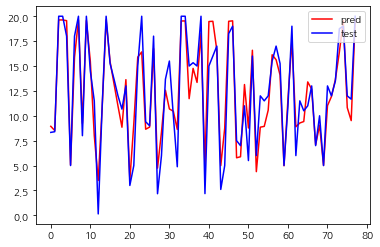

In [47]:
plt.plot(pred, label='pred', c='red')
plt.plot(data_2020.iloc[:,9].values, label='test', c='blue')
plt.legend(loc='upper right')
plt.show()

In [39]:
a = pd.DataFrame(pred, data_2020.iloc[:,9])
a.to_csv('a.csv')
a

,0
신용등급점수,
8.33,8.941387
8.40,8.519048
20.00,19.629822
20.00,19.629822
18.00,19.555212
...,...
18.75,16.393606
19.00,19.560226
12.00,10.819570


<AxesSubplot:>

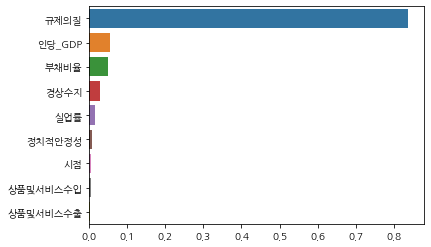

In [21]:
fi = pd.Series(rf.feature_importances_, rf.feature_names_in_)
fi = fi.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=fi.values, y=fi.index)

In [22]:
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_train_ss = pd.DataFrame(x_train_ss, columns=x_train.columns)
x_test_ss = ss.fit_transform(x_test)
x_test_ss = pd.DataFrame(x_test_ss, columns=x_test.columns)

rf1 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf1.fit(x_train_ss, y_train)
pred = rf1.predict(x_test_ss)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(pred, y_test)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2}')

mse : 3.4267038706629114 
rmse : 1.8511358325803409 
r2 : 0.8552769999320055


<AxesSubplot:>

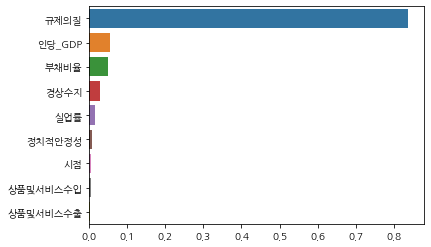

In [23]:
fi1 = pd.Series(rf1.feature_importances_, x_train_ss.columns)
fi1 = fi1.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=fi.values, y=fi.index)